In [1]:
import pandas as pd #importing pandas

# Import the dataset

In [2]:
df = pd.read_csv("Customer Service_Requests_from_2010_to_Present.csv", low_memory=False)  #import dataset

# Provide your insight on the information and details that the provided dataset carries

In [3]:
print(df.shape) # Printing the number of rows and columns in the DataFrame

(300698, 53)


In [4]:
df.info() # Displaying summary information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

# Convert the columns "Created Date" and "Closed Date" to datetime
# datatype and create a new column "Request_Closing_Time" as the
# time elapsed between request creation and request closing

In [5]:
# Formatting for Created Date using mixed format
df['Created Date'] = pd.to_datetime(df['Created Date'], format='mixed')

# Formatting for Closed Date using mixed format
df['Closed Date'] = pd.to_datetime(df['Closed Date'], format='mixed')
# Calculating time difference in hours
df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600

# Displaying the results
df[['Created Date', 'Closed Date', 'Request_Closing_Time']].head()

,Created Date,Closed Date,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,0.920833
1,2015-12-31 23:59:44,2016-01-01 01:26:00,1.437778
2,2015-12-31 23:59:29,2016-01-01 04:51:00,4.858611
3,2015-12-31 23:57:46,2016-01-01 07:43:00,7.753889
4,2015-12-31 23:56:58,2016-01-01 03:24:00,3.450556


# Write a python program to drop irrelevant Columns which are listed below

In [6]:
drop_columns =  [
    'Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2',
    'Intersection Street 1', 'Intersection Street 2','Address Type','Park Facility Name',
    'Park Borough','School Name', 'School Number','School Region','School Code',
    'School Phone Number','School Address','School City','School State','School Zip',
    'School Not Found','School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough',
    'Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp',
    'Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name',
    'Landmark','X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date',
    'Resolution Action Updated Date','Community Board','Facility Type','Location'
] # Dropping unnecessary or irrelevant columns from the DataFrame
latest_df = df.drop(columns=drop_columns)
latest_df.shape # Displaying the new shape of the DataFrame

(300698, 15)

In [7]:
latest_df.info()
latest_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unique Key              300698 non-null  int64         
 1   Created Date            300698 non-null  datetime64[ns]
 2   Closed Date             298534 non-null  datetime64[ns]
 3   Agency                  300698 non-null  object        
 4   Complaint Type          300698 non-null  object        
 5   Descriptor              294784 non-null  object        
 6   Location Type           300567 non-null  object        
 7   Incident Zip            298083 non-null  float64       
 8   City                    298084 non-null  object        
 9   Status                  300698 non-null  object        
 10  Resolution Description  300698 non-null  object        
 11  Borough                 300698 non-null  object        
 12  Latitude                297158

(300698, 15)

# Write a python program to remove the NaN missing values from updated dataframe.

In [8]:
print("Columns before removing NaN Values:", latest_df.shape)  # Printing the shape of the DataFrame before removing NaN values

new_df = latest_df.dropna() # Removes all rows that contain any NaN values

print("Columns after removing NaN Values:", new_df.shape) # Printing the shape of the DataFrame after removing NaN values

Columns before removing NaN Values: (300698, 15)
Columns after removing NaN Values: (291107, 15)


## Write a python program to see the unique values from all the columns in the dataframe.

In [9]:
# Iterating through each column in the DataFrame and printing the unique values
for column in new_df.columns:
    unique_value = new_df[column].unique()
    print(unique_value)

[32310363 32309934 32309159 ... 30283424 30280004 30281825]
<DatetimeArray>
['2015-12-31 23:59:45', '2015-12-31 23:59:44', '2015-12-31 23:59:29',
 '2015-12-31 23:57:46', '2015-12-31 23:56:58', '2015-12-31 23:56:30',
 '2015-12-31 23:55:32', '2015-12-31 23:54:05', '2015-12-31 23:53:58',
 '2015-12-31 23:52:58',
 ...
 '2015-03-29 00:42:48', '2015-03-29 00:37:15', '2015-03-29 00:35:28',
 '2015-03-29 00:35:23', '2015-03-29 00:35:04', '2015-03-29 00:34:32',
 '2015-03-29 00:33:28', '2015-03-29 00:33:03', '2015-03-29 00:33:02',
 '2015-03-29 00:33:01']
Length: 251970, dtype: datetime64[ns]
<DatetimeArray>
['2016-01-01 00:55:00', '2016-01-01 01:26:00', '2016-01-01 04:51:00',
 '2016-01-01 07:43:00', '2016-01-01 03:24:00', '2016-01-01 01:50:00',
 '2016-01-01 01:53:00', '2016-01-01 01:42:00', '2016-01-01 08:27:00',
 '2016-01-01 01:17:00',
 ...
 '2015-03-29 00:57:23', '2015-03-29 02:57:41', '2015-03-29 01:02:39',
 '2015-03-29 04:14:27', '2015-03-29 08:41:24', '2015-03-29 02:52:28',
 '2015-03-29 01:13

# Data Analysis

##  Write a Python program to show summary statistics of sum, mean,
## standard deviation, skewness, and kurtosis of the data frame. 

#### Data frame summary

In [10]:
# Calculating and printing the sum of all numeric columns in the DataFrame
print("Sum:\n", new_df.sum(numeric_only = True)) 

Sum:
 Unique Key              9.112108e+12
Incident Zip            3.160833e+09
Latitude                1.185553e+07
Longitude              -2.152010e+07
Request_Closing_Time    1.254358e+06
dtype: float64


In [11]:
# Calculating and printing the mean of all numeric columns in the DataFrame
print("Mean:\n", new_df.mean(numeric_only = True))

Mean:
 Unique Key              3.130158e+07
Incident Zip            1.085798e+04
Latitude                4.072568e+01
Longitude              -7.392504e+01
Request_Closing_Time    4.308926e+00
dtype: float64


In [12]:
# Calculating and printing the standard deviation of all numeric columns in the DataFrame
print("Standard Deviation:\n", new_df.std(numeric_only = True))

Standard Deviation:
 Unique Key              575377.738707
Incident Zip               580.280774
Latitude                     0.082411
Longitude                    0.078654
Request_Closing_Time         6.062641
dtype: float64


In [13]:
# Calculating and printing the skewness of all numeric columns in the DataFrame
print("Skewness:\n", new_df.skew(numeric_only = True))

Skewness:
 Unique Key               0.016898
Incident Zip            -2.553956
Latitude                 0.123114
Longitude               -0.312739
Request_Closing_Time    14.299525
dtype: float64


In [14]:
# Calculating and printing the kurtosis of all numeric columns in the DataFrame
print("Kurtosis:\n", new_df.kurt(numeric_only = True))

Kurtosis:
 Unique Key               -1.176593
Incident Zip             37.827777
Latitude                 -0.734818
Longitude                 1.455600
Request_Closing_Time    849.777081
dtype: float64


## Write a Python program to calculate and show correlation of all variables.

In [15]:
# Calculating and printing the correlation matrix of all numeric columns in the DataFrame
new_df.corr(numeric_only=True)

,Unique Key,Incident Zip,Latitude,Longitude,Request_Closing_Time
Unique Key,1.000000,0.025492,-0.032613,-0.008621,0.053126
Incident Zip,0.025492,1.000000,-0.499081,0.385934,0.057182
Latitude,-0.032613,-0.499081,1.000000,0.368819,0.024497
Longitude,-0.008621,0.385934,0.368819,1.000000,0.109724
Request_Closing_Time,0.053126,0.057182,0.024497,0.109724,1.000000


# Data Exploration

## Write a Python program to calculate and show correlation of all variables. 

## Provide four major insights through visualization that you come up after data mining. 


In [16]:
import matplotlib.pyplot as plt #importing matplotlib

### Complaints Bar Graph

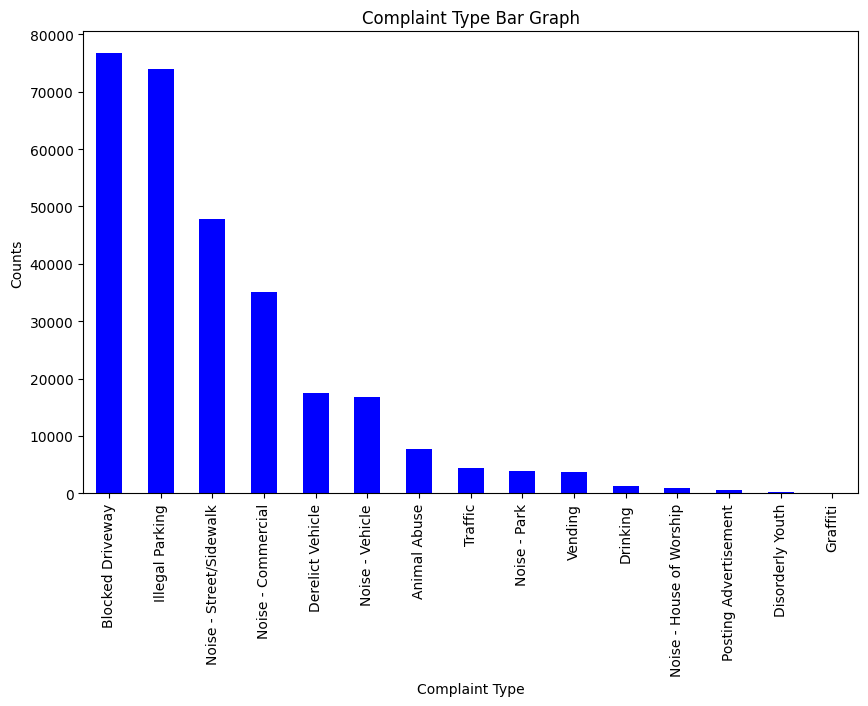

In [17]:
# 1. Complaint Type Bar Graph
plt.figure(figsize=(10,6))
new_df['Complaint Type'].value_counts().plot(kind='bar', color='blue')
plt.title('Complaint Type Bar Graph')
plt.xlabel('Complaint Type')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

The bar graph “Complaint type” identifies and displays different public complaints like Blocked Driveway, Noise-related issues such as Derelict Vehicle, Animal Abuse, Traffic violations, Vending, Drinking, Posting Advertisements, Disorderly Youth, and Graffiti. Each category indicates a specific kind of grievances reported by the people where the graph is likely to indicate the prevalence or severity of the grievances through the lengths of bars. 

### Borough Pie Chart

Borough
BROOKLYN         96858
QUEENS           79790
MANHATTAN        62033
BRONX            40217
STATEN ISLAND    12209
Name: count, dtype: int64


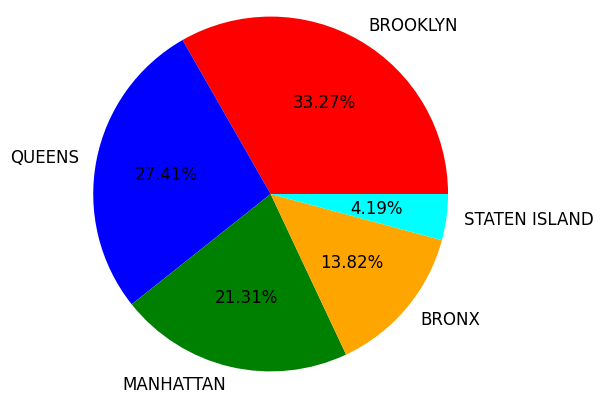

In [18]:
a = new_df['Borough'].value_counts()
print(a)
plt.pie(
    a[:5],
    labels=["BROOKLYN", "QUEENS", "MANHATTAN", "BRONX", "STATEN ISLAND"],
    colors=["red", "blue", "green", "orange", "cyan"],
    autopct='%.2f%%',
    radius=1.2,
    textprops={"fontsize": 12}
)
plt.show()

The pie chart indicates how the population occurs in New York City’s boroughs. The highest proportion is for Brooklyn with 33.27%, followed by Queens at 27.41%, Manhattan has 21.31%, Bronx 13.82%, with Staten Island recording the least share of 4.19%. The visualization has different colors for boroughs (red is for Brooklyn, blue for Queens, green for Manhattan, orange for Bronx, and light blue for Staten Island) demonstrating how Brooklyn and Queens form more than 60% of the city’s population, whereas Staten Island represents the small fraction of the city’s population.

### City Scatter Plot

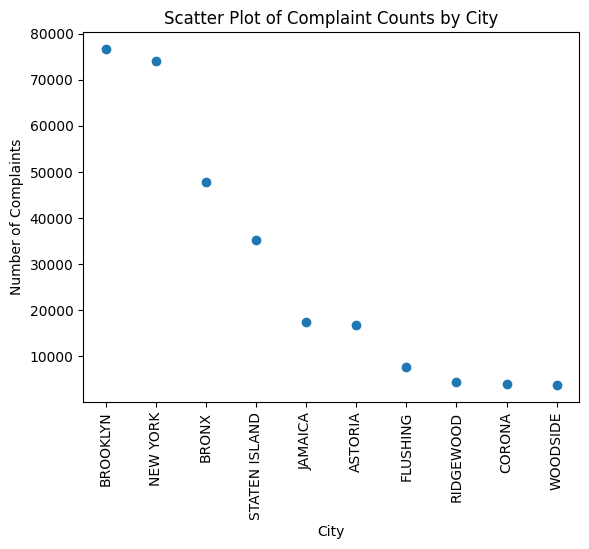

In [19]:
a = new_df['City'].value_counts().head(10).index
b = new_df['Complaint Type'].value_counts().head(10).values

plt.title("Scatter Plot of Complaint Counts by City")
plt.scatter(a, b)
plt.xlabel("City")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=90)
plt.show()

This scatter plot indicates the number of complaints in the top 10 cities, and there is an obvious decreasing pattern from left to right. Brooklyn records of complaints is about 77,000, and New York about 74,000, both being in the lead. The Bronx comes in third with about 48,000 complaints while Staten Island has about 35,000. The other cities record much fewer complaints, Jamaica, Astoria have about 18000 each, Flushing has around 8000, and Ridgewood, Corona and Woodside show fewer than 5000 complaints’ records each.

## Histogram of Distribution of Distribution of Complaints by City 

In [20]:
# Getting the top 10 cities by frequency
top_cities = new_df['City'].value_counts().nlargest(10).index

# Filtering the DataFrame to only include the top 10 cities
filtered_df = new_df[new_df['City'].isin(top_cities)]

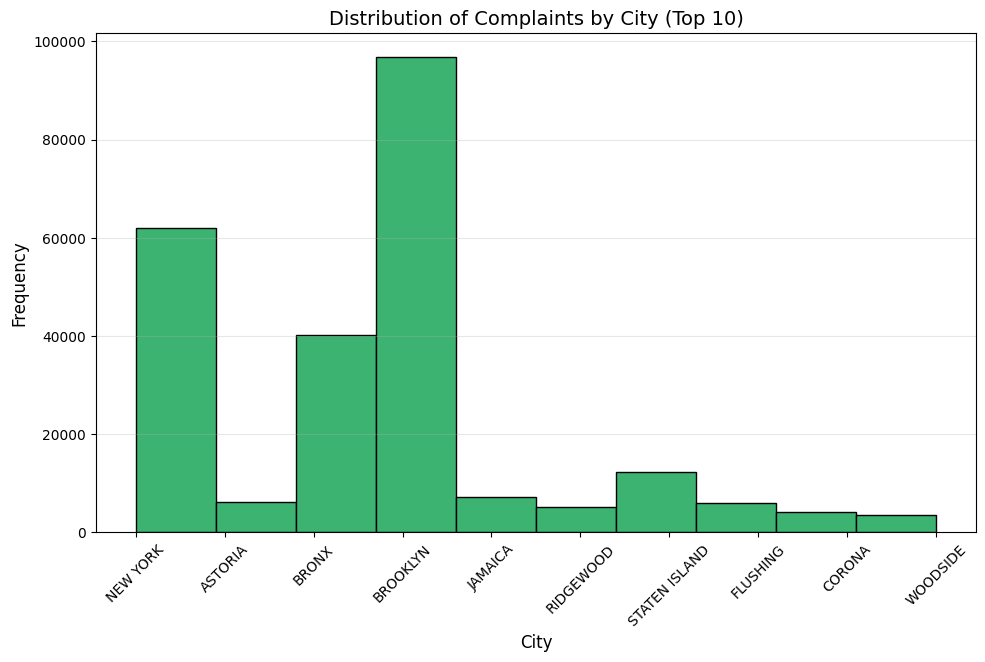

In [21]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['City'].dropna(), bins=len(top_cities), color='mediumseagreen', edgecolor='black')
plt.xlabel('City', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Complaints by City (Top 10)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

This bar chart represents the nature of complaints in the top 10 cities, with Brooklyn displaying the highest occurrence rate of almost 100,000 complaints, which dwarfs all other cities. New York comes second with approximately 62 000 complaints and Bronx is third with a few approximating 40 000. Staten Island possesses approximately 12,000 complaints and other cities (Jamaica, Ridgewood, Astoria, Flushing, Corona, and Woodside) show up to 10,000 complaints, while Astoria and Woodside are least. From the green bars, it can readily be seen that Brooklyn’s complain volume has been nearly double that of New York (the second highest).

## Arrange the complaint types according to their average
## 'Request_Closing_Time', categorized by various locations. Illustrate it
## through graph as well. 

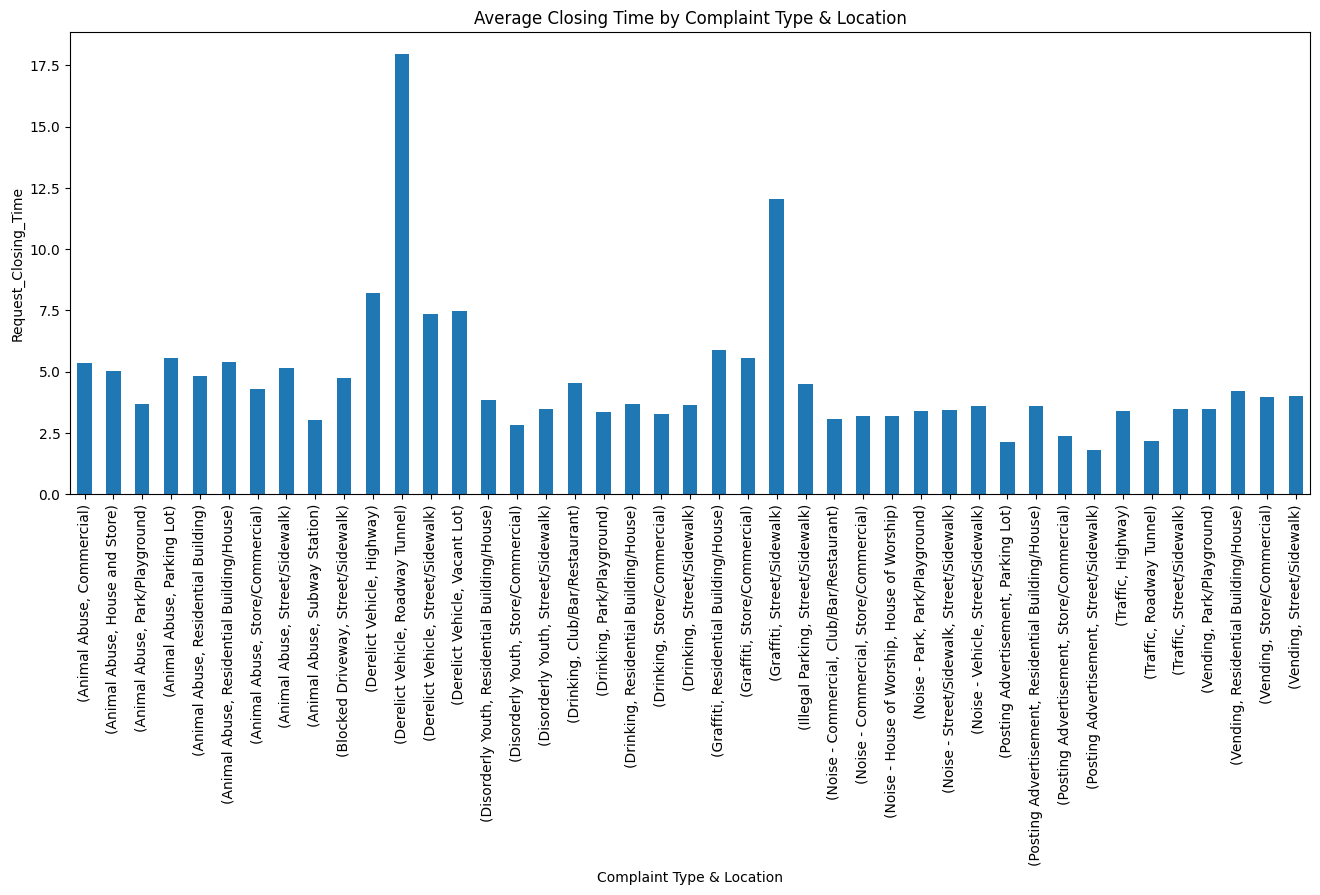

In [22]:
average_closing = new_df.groupby(['Complaint Type', 'Location Type'])['Request_Closing_Time'].mean()
plt.figure(figsize=(16, 6)) 
average_closing.plot(kind='bar', title='Average Closing Time by Complaint Type & Location')
plt.xlabel('Complaint Type & Location')
plt.ylabel('Request_Closing_Time')
plt.xticks(rotation=90)
plt.show()

This bar chart shows mean closing times for various complaint type in different places. The maximum average closing time that is about 17.5 days is apparently "Roadway Streetlights” complaints.” A second outstanding peak is around 12 days for another complaint dispensation category. All other type of complaints presents significantly lower resolution times, ranging from 2.5 to 5 days. The x-axis labels are closely placed and rotated, presenting combinations of complaint types and location, while y-axis shows “Request Closing Time” in days. The visualization shows a great occurrence of response efficiency differences between different service categories, with most complaints being settled within 1 week with some types requiring much longer time to process.

# Statistical Testing

## Test 1: Whether the average response time across complaint types is similar or not

###  State the Null Hypothesis (H0) and Alternate Hypothesis (H1).

###### Null Hypothesis(H0): It indicates that avg response time is the same irrespective to Complaint Types.

###### Alternate Hypothesis(H1): It indicates that there is at least one type of Complaint with different avg response time.

### Perform the statistical test and provide the p-value.

In [23]:
from scipy.stats import f_oneway

# Grouping resolution times by complaint type
grouped_data = [group["Request_Closing_Time"].values for _, group in new_df.groupby("Complaint Type")]

# Run ANOVA test
anova_result = f_oneway(*grouped_data)

# Print result
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# Interpret the results to accept or reject the Null Hypothesis.

if anova_result.pvalue < 0.05:
    print("Reject H₀: Response times significantly differ between complaint types.")
else:
    print("Fail to reject H₀: No significant difference in response times among complaint types.")

F-statistic: 578.9120337398356
P-value: 0.0
Reject H₀: Response times significantly differ between complaint types.


The result of the Test1 is that the p-value is significantly less than 0.05, so we reject the null hypothesis (H₀) which means that there is a statistically significant difference in average Request_Closing_Time between different complaint types.

## Test 2: Whether the type of complaint or service requested and location are related.

### State the Null Hypothesis (H0) and Alternate Hypothesis (H1).

###### Null Hypothesis(H0): It indicates that the type of Complaint and borough are independent.

###### Alternate Hypothesis(H1): It indicates that Complaint Type and borough are dependent(related).

### Perform the statistical test and provide the p-value.

In [24]:
from scipy.stats import chi2_contingency
import pandas as pd

contingency_table = pd.crosstab(new_df["Complaint Type"], new_df["Borough"])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_value)

# Interpret the results to accept or reject the Null Hypothesis.

if p_value < 0.05:
    print("Reject H₀: There is a link between complaint type and location.")
else:
    print("Fail to reject H₀: No clear link between complaint type and location.")

Chi-square Statistic: 73264.62164334783
P-value: 0.0
Reject H₀: There is a link between complaint type and location.


The result of the Test2 is that the p-value is less than 0.05, therefore, null hypothesis (H₀) is rejected which means that there is a link between the type of complaint and the borough-some forms of complaint are more common in some areas than in others.